Nolan Roth <br>
PHYS434 <br>

# Lab #3

In [5]:
%matplotlib inline
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import scipy
from scipy import stats
from scipy import signal
from scipy.stats import norm
from astropy.table import QTable, Table, Column
from astropy import units as u
import numpy as np

plt.rcParams["figure.figsize"] = (20, 15)

## Problem 1

Plotting the normal distribution with $\mu$ = 12 and $\sigma$ = 0.4 on top of given histogram:

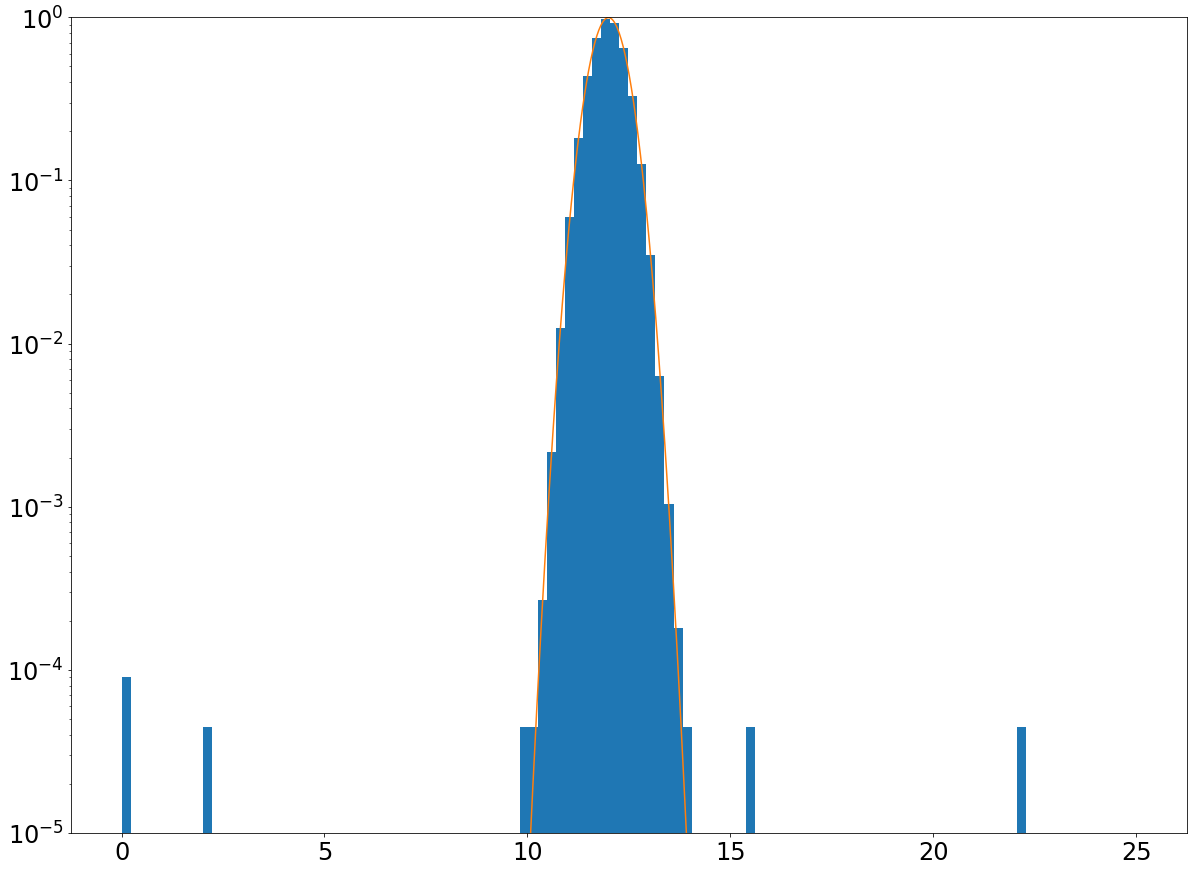

In [162]:
d = np.append(stats.norm.rvs(loc = 12., scale = 0.4, size = 100000), [10., 10.3, 2.1, 0., 0., 15.6, 22.3, 12.7])
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.norm.pdf(x, 12, 0.4))
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.ylim(10e-6, 1)
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

Statistical question: Which data points have a much higher occurance than is predicted by the normal probability distribution?


Question in math: For which values of x does y have a value much higher than y given by stats.norm.pdf(x)?

Truth table for this question:

In [160]:
t1 = QTable()
t1[' '] = ['My Test Good', 'My Test Bad']
t1['True T'] = [ 1,1 ]
t1['Bad T'] = [1 ,1 ]
t1

,True T,Bad T
str12,int64,int64
My Test Good,1,1
My Test Bad,1,1


In [168]:
# prob = 1 - stats.norm.cdf(15, 12, 0.4)
# print(prob)
# prob2 = 1 - stats.norm.cdf(17, 12, 0.4)
# print(prob - prob2)
i = 0
removed_values = []
while i < len(d):
    if d[i] >= 12.0:
        prob = 1 - stats.norm.cdf(d[i], 12, 0.4)
    elif d[i] < 12.0:
        prob = stats.norm.cdf(d[i], 12, 0.4)
    if prob < 9e-6:
        removed_values.append(d[i])
        d = np.delete(d, i)
        i-=1
    i+=1
print(len(d))
print(removed_values)

100000
[]


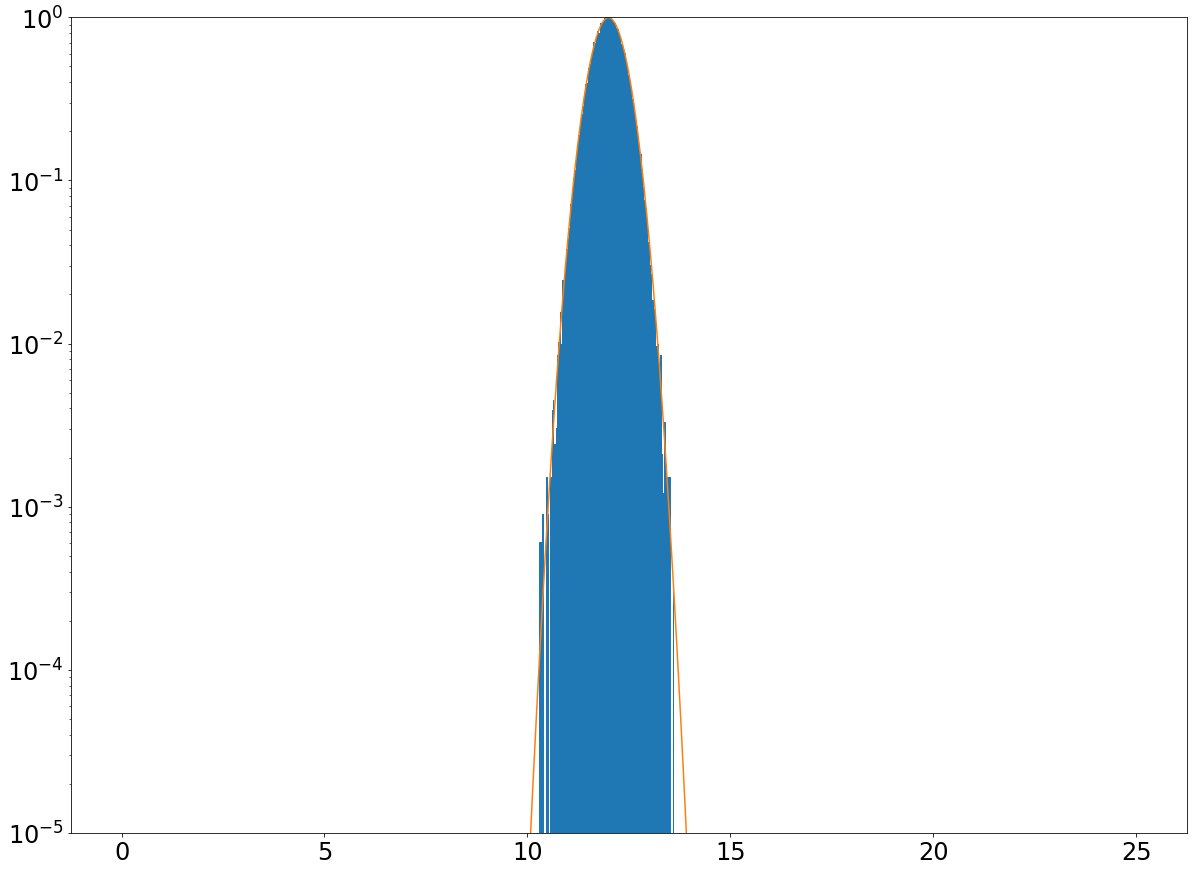

In [159]:
fig, ax = plt.subplots(1, 1)
ax.hist(d,100, density=True)
x = np.linspace(0, 25, 1000)
plt.plot(x, stats.norm.pdf(x, 12, 0.4))
plt.tick_params(labelsize = 24)
plt.yscale('log')
plt.ylim(10e-6, 1)
#x = np.linspace(4.95,5.05,1000)
#ax.plot(x,stats.norm.pdf(x,loc = 5., scale = 0.01),linewidth = 8,alpha = 0.7)
plt.show()

My algorithm succeeded in removing 6 of the 'bad' data points while removing 2 'good' data points as well. It failed to remove 2 of the 'bad data points. The truth table for my algorithm:

In [167]:
t1 = QTable()
t1[' '] = ['My Test Good', 'My Test Bad']
t1['True T'] = [ 9998, 2]
t1['Bad T'] = [6 , 2]
t1

,True T,Bad T
str12,int64,int64
My Test Good,9998,6
My Test Bad,2,2


## Problem 2

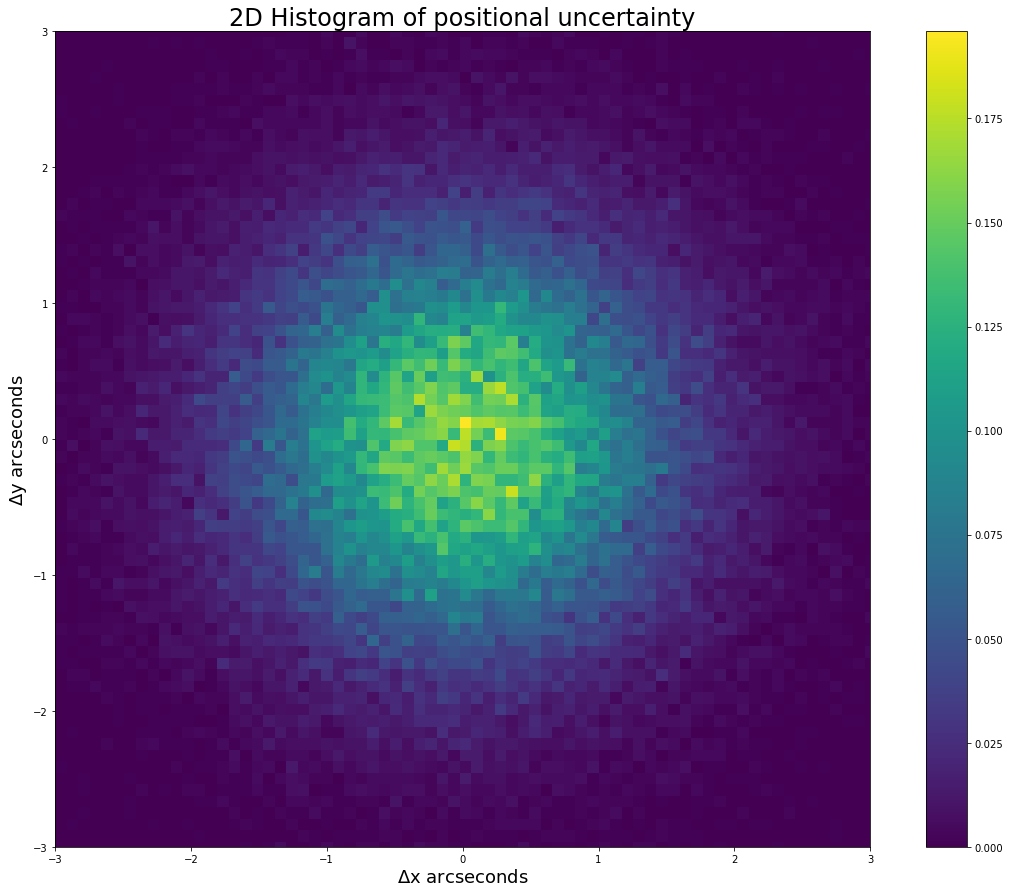

In [73]:
a = np.vstack((stats.norm.rvs( scale = 1, size = 100000), stats.norm.rvs( scale = 1, size = 100000)))
a.shape
fig, ax = plt.subplots(1, 1)
h = ax.hist2d(a[0,:],a[1,:],bins=100, density=True);
ax.set_aspect('equal', 'box')
plt.xlim([-3 , 3])
plt.ylim([-3 , 3])
plt.title("2D Histogram of positional uncertainty", fontsize = 24)
plt.ylabel("$\Delta$y arcseconds", fontsize = 18)
plt.xlabel("$\Delta$x arcseconds", fontsize = 18)
plt.colorbar(h[3], ax=ax)